# 01 - Exploratory Data Analysis & Cleaning
### Dataset: FedEx Shipment Records

In [5]:
# 📦 Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
sns.set(style="whitegrid")

In [6]:
# 📁 Load Data
df = pd.read_csv('../data/processed/fedex_cleaned.csv')
print("Initial shape:", df.shape)
df.head()

Initial shape: (3604175, 21)


,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,...,Source,Destination,Distance,Delivery_Status,Pickup_Date,Delivery_Date,Delay,Pickup_DayOfWeek,Is_Weekend,Pickup_Weekday
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,...,IAD,TPA,810,0.0,2008-01-03,2008-01-11,8.0,3,False,Thursday
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,...,IAD,TPA,810,1.0,2008-01-03,2008-01-22,19.0,3,False,Thursday
2,2008,1,3,4,628.0,620,750,WN,448,90.0,...,IND,BWI,515,0.0,2008-01-03,2008-01-11,8.0,3,False,Thursday
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,...,IND,BWI,515,0.0,2008-01-03,2007-12-30,-4.0,3,False,Thursday
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,...,IND,BWI,515,1.0,2008-01-03,2008-02-06,34.0,3,False,Thursday


In [8]:
# 📋 Basic Info
print(df.info())
print(df.describe())
print("Columns:", df.columns.tolist())
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
 15  Pickup_Date            object 
 16  Delivery_Date          object 
 17  Delay                  float64
 18  Pickup_DayOfWeek       int64  
 19  Is_Weekend             bool   
 20  Pickup_Weekday         object 
dtypes: bool(1), float64(5), int64(9), object(6)
memory usa

In [9]:
# 🛠️ Rename and Standardize Columns
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={'DayOfMonth': 'DayofMonth'}, inplace=True)

In [10]:
# 📆 Create Pickup_Date
df['Pickup_Date'] = pd.to_datetime(dict(
    year=df['Year'],
    month=df['Month'],
    day=df['DayofMonth']
))

In [11]:
# 📦 Create Delivery_Date and Delay Column
df['Delivery_Date'] = df['Pickup_Date'] + pd.to_timedelta(df['Shipment_Delay'], unit='D')
df['Delay'] = df['Shipment_Delay']

In [12]:
# 📊 Add Time Features
df['Pickup_DayOfWeek'] = df['Pickup_Date'].dt.dayofweek
df['Pickup_Weekday'] = df['Pickup_Date'].dt.day_name()
df['Is_Weekend'] = df['Pickup_DayOfWeek'].isin([5, 6])

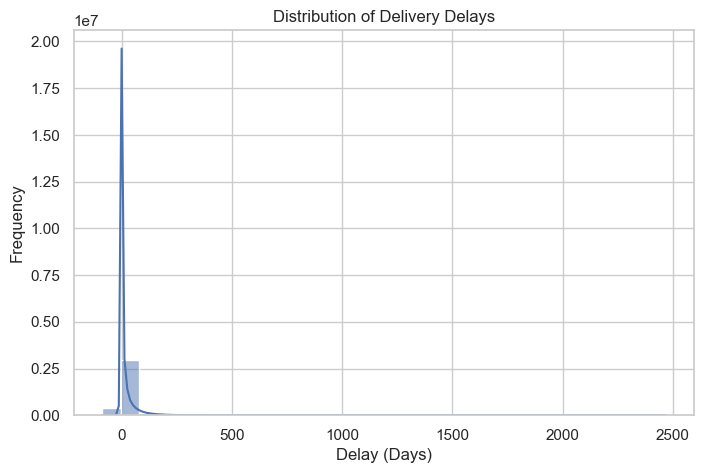

In [13]:
# 📈 Histogram: Delivery Delays
plt.figure(figsize=(8, 5))
sns.histplot(df['Delay'], kde=True, bins=30)
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delay (Days)')
plt.ylabel('Frequency')
plt.show()

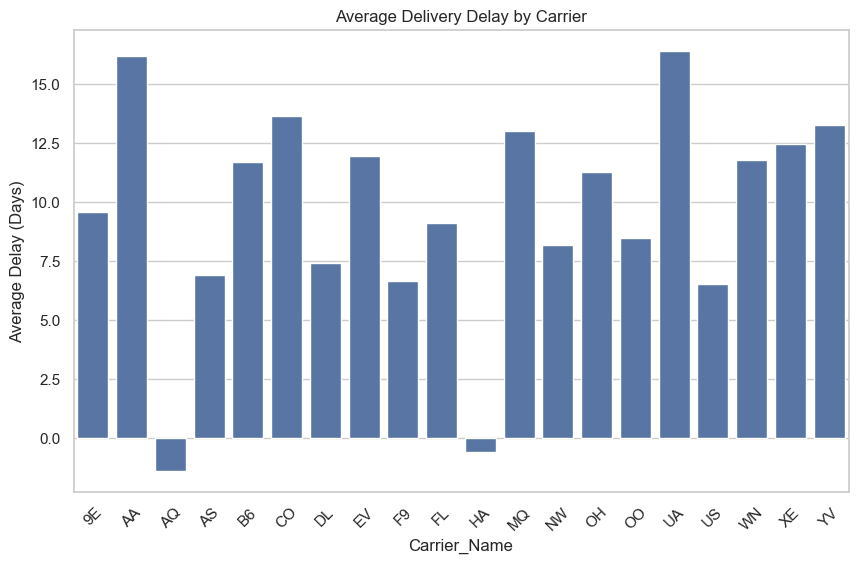

In [14]:
# 📈 Average Delay by Carrier
plt.figure(figsize=(10, 6))
carrier_avg = df.groupby('Carrier_Name')['Delay'].mean().reset_index()
sns.barplot(x='Carrier_Name', y='Delay', data=carrier_avg)
plt.title('Average Delivery Delay by Carrier')
plt.xticks(rotation=45)
plt.ylabel('Average Delay (Days)')
plt.show()

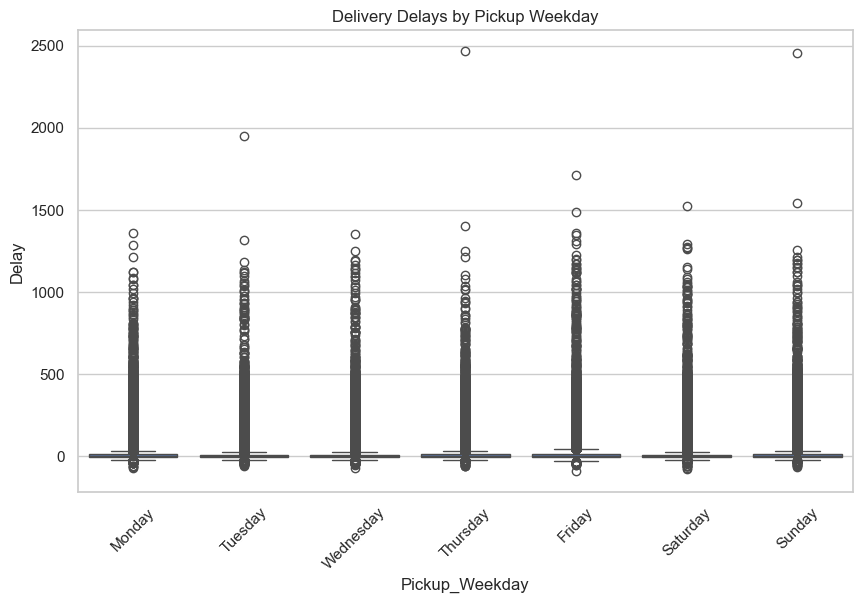

In [15]:
# 📈 Boxplot: Delay by Pickup Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pickup_Weekday', y='Delay', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Delivery Delays by Pickup Weekday')
plt.xticks(rotation=45)
plt.show()

In [16]:
# 💾 Save Cleaned Dataset
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/fedex_cleaned.csv', index=False)
print("Saved cleaned data to ../data/processed/fedex_cleaned.csv")

Saved cleaned data to ../data/processed/fedex_cleaned.csv
